In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [4]:
from datetime import datetime
import plotly.express as px
import pandas as pd

In [5]:
def load_and_clean_pedestrian_data(path):
    df = pd.read_csv(path)
    df["datetime"] = pd.to_datetime(
        {
            "day": df["Mdate"],
            "year": df["Year"],
            "hour": df["Time"],
            "month": df["Month"].apply(
                lambda month: datetime.strptime(month, "%B").month
            ),
        }
    )
    return df

In [6]:
data_df = load_and_clean_pedestrian_data("/home/ned/data/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv")

FileNotFoundError: [Errno 2] File b'/home/ned/data/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv' does not exist: b'/home/ned/data/Pedestrian_Counting_System___2009_to_Present__counts_per_hour_.csv'

In [5]:
data_df.head()

,ID,Date_Time,Year,Month,Mdate,Day,Time,Sensor_ID,Sensor_Name,Hourly_Counts,datetime
0,1,05/01/2009 12:00:00 AM,2009,May,1,Friday,0,1,Bourke Street Mall (North),53,2009-05-01
1,2,05/01/2009 12:00:00 AM,2009,May,1,Friday,0,2,Bourke Street Mall (South),52,2009-05-01
2,3,05/01/2009 12:00:00 AM,2009,May,1,Friday,0,4,Town Hall (West),209,2009-05-01
3,4,05/01/2009 12:00:00 AM,2009,May,1,Friday,0,5,Princes Bridge,157,2009-05-01
4,5,05/01/2009 12:00:00 AM,2009,May,1,Friday,0,6,Flinders Street Station Underpass,139,2009-05-01


In [6]:
data_df["datetime"]

0         2009-05-01 00:00:00
1         2009-05-01 00:00:00
2         2009-05-01 00:00:00
3         2009-05-01 00:00:00
4         2009-05-01 00:00:00
                  ...        
2925682   2019-11-30 23:00:00
2925683   2019-11-30 23:00:00
2925684   2019-11-30 23:00:00
2925685   2019-11-30 23:00:00
2925686   2019-11-30 23:00:00
Name: datetime, Length: 2925687, dtype: datetime64[ns]

## Yearly plots

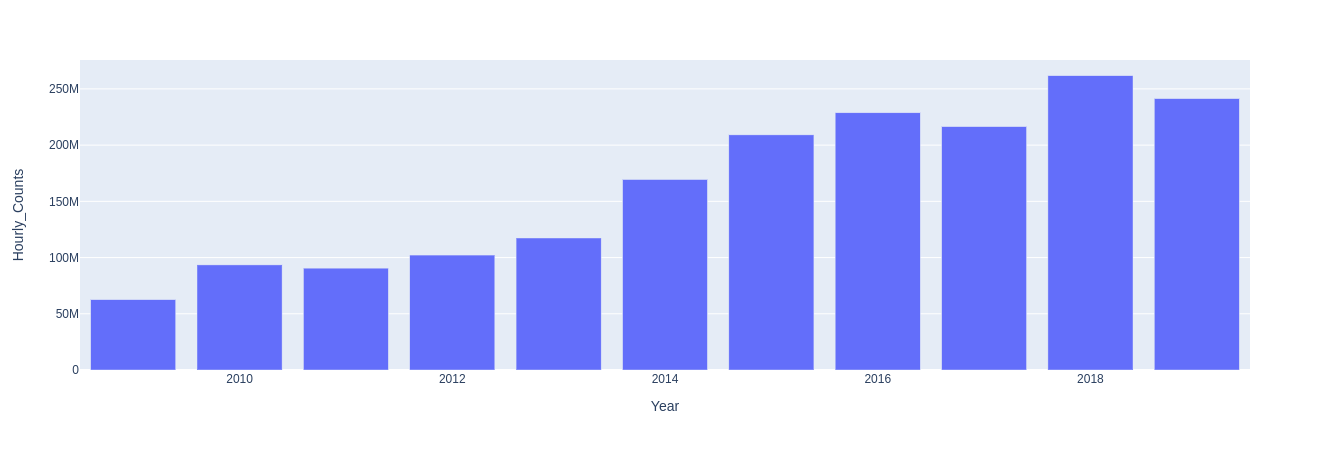

In [13]:
year_counts_df = data_df.groupby("Year")["Hourly_Counts"].sum().reset_index()
px.bar(year_counts_df, x="Year", y="Hourly_Counts")